<a href="https://colab.research.google.com/github/tazar09/situatii_financiare_2022/blob/main/sit_fin_2023%5B05oct%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import re

# Import coduri pentru impozite

In [ ]:
#Import cod impozit dataframe
url_cod = '/content/cod_impozit.xlsx'
lista_impozite = pd.read_excel(url_cod)
lista_impozite['COD_IMP'] = 'IMP' + lista_impozite['COD_IMP'].astype(str)
lista_impozite.head()

# Import situatii financiare anul 2022

In [ ]:
#Import situatii financiare dataframe
url_web_bl_bs_2022 = 'https://data.gov.ro/dataset/aa2567a4-e7d7-4e6e-ab19-d08d39f99996/resource/b35fab04-f101-42d7-a765-8f41728b373a/download/web_bl_bs_sl_an2022.txt'
df_base = pd.read_csv(url_web_bl_bs_2022, dtype = {'CUI':str, 'CAEN':str}, thousands = ',')

In [ ]:
df = df_base.copy()

In [ ]:
df.head()

,CUI,CAEN,I1,I2,I3,I4,I5,I6,I7,I8,...,I11,I12,I13,I14,I15,I16,I17,I18,I19,I20
0,1758080,4931,16250707.0,12600287.0,922470.0,11449101.0,228716.0,650906.0,27949623,21426.0,...,210755.0,NaN,39213937.0,40326671.0,39905042.0,421629.0,0.0,274227.0,0.0,NaN
1,1770555,2899,4382308.0,13167071.0,6243032.0,3050034.0,3874005.0,25919.0,7307533,NaN,...,720.0,NaN,21480601.0,21616592.0,18740693.0,2875899.0,0.0,2486912.0,0.0,99.0
2,1772076,1431,3991824.0,13670457.0,9949344.0,2795638.0,925475.0,35908.0,6032140,486167.0,...,3990125.0,NaN,19048965.0,21765244.0,21733706.0,31538.0,0.0,31538.0,0.0,197.0
3,1774336,4941,21747409.0,12896215.0,10201046.0,1945071.0,750098.0,450.0,1258049,NaN,...,15000.0,NaN,16695296.0,13086584.0,11190142.0,1896442.0,0.0,1645894.0,0.0,19.0
4,2763904,1089,3186213.0,53223368.0,36399030.0,6481835.0,10342503.0,15708.0,23711439,NaN,...,17000000.0,NaN,42440258.0,43968685.0,40528519.0,3440166.0,0.0,3035703.0,0.0,46.0


# Formatare coloane main dataframe

## Import df coloane.

In [ ]:
#Import coloane dataframe
url_coloane_2022 = 'https://data.gov.ro/dataset/aa2567a4-e7d7-4e6e-ab19-d08d39f99996/resource/0079a6b0-0a5a-4be9-a26a-857449f41c25/download/web_bl_bs_sl_an2022.csv'
coloane = pd.read_csv(url_coloane_2022)

## Redenumire coloane.

In [ ]:
list_ind = list(coloane['CUI;CUI'])
list_ind.insert(0, 'CUI')
len(list_ind)

22

In [ ]:
df.columns = list_ind

In [ ]:
columns_names = list(df.columns)

In [ ]:
# Regex pattern
regex = r';i\d{1,2}$'

# Apply the regex pattern to the column names
new_column_names = []
for column_name in columns_names:
    new_column_name = re.sub(regex, '', column_name)
    new_column_names.append(new_column_name)

In [ ]:
df.columns = new_column_names
df.columns = df.columns.str.lower()

In [ ]:
df.columns = ['cui', 'caen', 'activ_total',
       'activ_circ', 'stocuri', 'creante',
       'casa_banci', 'chel_avans', 'datorii',
       'ven_avans', 'proviz', 'KP',
       'cap_subs_varsat', 'patrim_reg',
       'CA', 'ven_tot', 'chelt_tot',
       'prof_brut', 'pierd_bruta', 'prof_net', 'pierd_neta',
       'salar_med']

In [ ]:
df.head()

,cui,caen,activ_total,activ_circ,stocuri,creante,casa_banci,chel_avans,datorii,ven_avans,...,cap_subs_varsat,patrim_reg,CA,ven_tot,chelt_tot,prof_brut,pierd_bruta,prof_net,pierd_neta,salar_med
0,1758080,4931,16250707.0,12600287.0,922470.0,11449101.0,228716.0,650906.0,27949623,21426.0,...,210755.0,NaN,39213937.0,40326671.0,39905042.0,421629.0,0.0,274227.0,0.0,NaN
1,1770555,2899,4382308.0,13167071.0,6243032.0,3050034.0,3874005.0,25919.0,7307533,NaN,...,720.0,NaN,21480601.0,21616592.0,18740693.0,2875899.0,0.0,2486912.0,0.0,99.0
2,1772076,1431,3991824.0,13670457.0,9949344.0,2795638.0,925475.0,35908.0,6032140,486167.0,...,3990125.0,NaN,19048965.0,21765244.0,21733706.0,31538.0,0.0,31538.0,0.0,197.0
3,1774336,4941,21747409.0,12896215.0,10201046.0,1945071.0,750098.0,450.0,1258049,NaN,...,15000.0,NaN,16695296.0,13086584.0,11190142.0,1896442.0,0.0,1645894.0,0.0,19.0
4,2763904,1089,3186213.0,53223368.0,36399030.0,6481835.0,10342503.0,15708.0,23711439,NaN,...,17000000.0,NaN,42440258.0,43968685.0,40528519.0,3440166.0,0.0,3035703.0,0.0,46.0


# Import lista de platitori

In [36]:
#Import lista platitori
url_platitori = '/content/date_identificar_platitori_2023_txt..txt'
lista_platitori_base = pd.read_csv(url_platitori, sep = '|', on_bad_lines='skip')

FileNotFoundError: ignored

In [ ]:
lista_platitori = lista_platitori_base.copy()

In [ ]:
lista_platitori.head(1)

,COD_FISCAL,DENUMIRE,COD_FISCAL_PARINTE,TIP_UNITATE,TIP_CONTRIB,LOCALITATE,STRADA,NR,DATA_INREGISTRARE,DATA_PRELUCRARE,...,IMP712,IMP713,IMP755,IMP756,IMP940,DETALII_ADRESA,BLOC,SCARA,ETAJ,AP
450.0,CONFLUX SA,NaN,Sediu central,PJ,Bucureşti,Str. SABINELOR,8,19/Jul/12,02/Jan/18 11:07:16 AM,3371515,...,NU,NU,NU,NU,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
lista_platitori.reset_index(inplace = True)

In [ ]:
lista_platitori.columns = ['COD_FISCAL', 'DENUMIRE', 'COD_FISCAL_PARINTE', 'TIP_UNITATE',
       'TIP_CONTRIB', 'LOCALITATE', 'STRADA', 'NR', 'DATA_INREGISTRARE',
       'DATA_PRELUCRARE', 'FAX', 'SECTOR', 'TELEFON', 'JUDET_COMERT',
       'NR_COMERT', 'AN_COMERT', 'ACT_AUTORIZARE', 'TVA', 'DATA_RADIERE',
       'COD_POSTAL', 'DATA_STARE', 'STARE', 'JUDET', 'IMP100', 'IMP120',
       'IMP130', 'IMP160', 'ACCIZE200', 'CONT410', 'CONT412', 'CONT416',
       'CONT420', 'CONT423', 'CONT430', 'CONT432', 'IMP439', 'IMP451',
       'IMP461', 'IMP473', 'IMP474', 'CONT480', 'IMP500', 'IMP602', 'IMP611',
       'IMP625', 'IMP632', 'IMP633', 'IMP634', 'IMP701', 'IMP710', 'IMP711',
       'IMP712', 'IMP713', 'IMP755', 'IMP756', 'IMP940', 'DETALII_ADRESA',
       'BLOC', 'SCARA', 'ETAJ', 'AP', 'empty']

In [ ]:
lista_platitori.columns = lista_platitori.columns.str.lower()

In [ ]:
lista_platitori.head(3)

,cod_fiscal,denumire,cod_fiscal_parinte,tip_unitate,tip_contrib,localitate,strada,nr,data_inregistrare,data_prelucrare,...,imp713,imp755,imp756,imp940,detalii_adresa,bloc,scara,etaj,ap,empty
0,450.0,CONFLUX SA,NaN,Sediu central,PJ,Bucureşti,Str. SABINELOR,8,19/Jul/12,02/Jan/18 11:07:16 AM,...,NU,NU,NU,NU,NaN,NaN,NaN,NaN,NaN,NaN
1,949.0,SOCIETATEA DE CONSTRUCTII IN TRANSPORTURI BUCU...,NaN,Sediu central,PJ,Bucureşti,Str. OPANEZ,3A,25/Jan/23 11:15:33 AM,25/Jan/23 11:15:33 AM,...,NU,DA,NU,NU,NaN,NaN,NaN,NaN,NaN,NaN
2,3635.0,MULTICOM IODAN S.R.L.,NaN,Sediu central,PJ,BUCURESTI,Sos. PANTELIMON,358,13/Jan/23 5:04:36 PM,13/Jan/23 5:04:36 PM,...,NU,NU,NU,NU,NaN,15 ABC,NaN,NaN,NaN,NaN


In [ ]:
lista_platitori['cod_fiscal'] = lista_platitori['cod_fiscal'].astype(str)

## Selectie coloane din lista platitori.

In [ ]:
lista_platitori_short = lista_platitori[['cod_fiscal', 'denumire', 'imp100']]
lista_platitori_short.head(5)

,cod_fiscal,denumire,imp100
0,450.0,CONFLUX SA,DA
1,949.0,SOCIETATEA DE CONSTRUCTII IN TRANSPORTURI BUCU...,DA
2,3635.0,MULTICOM IODAN S.R.L.,DA
3,5750.0,RUSTA PROD COM SRL,DA
4,7963.0,COMPACT COM S.R.L.,DA


In [ ]:
lista_platitori_short.shape

(2337378, 3)

## Formatare coloane as str.

In [ ]:
lista_platitori_short = lista_platitori_short.dropna(axis = 0)

In [ ]:
lista_platitori_short['cod_fiscal'] = lista_platitori_short['cod_fiscal'].astype(float)

In [ ]:
lista_platitori_short['cod_fiscal'] = lista_platitori_short['cod_fiscal'].astype(int)

In [ ]:
lista_platitori_short['cod_fiscal'] = lista_platitori_short['cod_fiscal'].astype(str)

In [ ]:
lista_platitori_short.dtypes

In [ ]:
lista_platitori_short.isna().sum()

In [ ]:
lista_platitori_short = lista_platitori_short[lista_platitori_short['imp100'].str.contains('DA')]

In [ ]:
lista_platitori_short.rename(columns = {'cod_fiscal': 'cui'}, inplace = True)

In [ ]:
lista_platitori_short.head(2)

# Merging to main dataframe

In [ ]:
#Merging
df = df.merge(lista_platitori_short, on= 'cui', how = 'left')

In [ ]:
df= df[['cui', 'denumire','caen', 'activ_total', 'activ_circ', 'stocuri', 'creante',
       'casa_banci', 'chel_avans', 'datorii', 'ven_avans', 'proviz', 'KP',
       'cap_subs_varsat', 'patrim_reg', 'CA', 'ven_tot', 'chelt_tot',
       'prof_brut', 'pierd_bruta', 'prof_net', 'pierd_neta', 'salar_med']]

# Exporting the main dataframe

In [ ]:
# df.to_csv('platitori_profit_2022.csv', index=False)

# EDA

In [194]:
import pandas as pd
pd.options.display.max_rows = 999

In [195]:
df = pd.read_csv('/content/platitori_profit_2022.csv')


In [196]:
df['denumire'] = df['denumire'].str.replace('S.R.L.', '')
df['denumire'] = df['denumire'].str.replace('SRL', '')
df['denumire'] = df['denumire'].str.replace('SA', '')
df['denumire'] = df['denumire'].str.replace('S.A.', '')

<ipython-input-196-054257245c84>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['denumire'] = df['denumire'].str.replace('S.R.L.', '')
<ipython-input-196-054257245c84>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df['denumire'] = df['denumire'].str.replace('S.A.', '')


In [197]:
df.shape

(76639, 23)

In [198]:
df.dropna(subset = 'denumire', axis = 0, inplace = True)

In [199]:
df[df['denumire'].isna()].shape

(0, 23)

In [237]:
publice = ['COMPANIA NAŢIONALĂ', 'REGIA', 'TRANSPORT PUBLIC', 'DRUMURI SI PODURI', 'GOSPODARIREA COMUNALA', 'OCOLUL SILVIC', 'AEROPORT', 'PARCUL INDUSTRIAL',
           'DOMENIU PUBLIC', 'DOMENIUL PUBLIC','PUBLICĂ URBANĂ', 'A PATRIMONIULUI', 'UTILITĂŢI PUBLICE', 'DE SERVICII PUBLICE', 'ADMINISTRAŢIA DOMENIULUI PUBLIC',
           'SERVICII DE UTILITATE PUBLICĂ',
           'TRANSPORT URBAN PUBLIC', 'ADMINISTRARE A DOMENIULUI', 'SERVICII PUBLICE DE', 'GOSPODĂRIA COMUNALĂ',	'UTILITATI PUBLICE',
           'SERVICII PUBLICE', 'ADMINISTRAREA DOMENIULUI',
           'DIRECŢIA PUBLICĂ', 'SERVICIUL PUBLIC LOCAL', 'SERVICII ADMINISTRATIV-PUBLICE', 'SOCIETATEA DE ADMINISTRARE A DOMENIULUI',
           'SERVICIUL PUBLIC DE ALIMENTARE CU APA', 'APĂ CANAL',
           'COMPANIA MUNICIPALĂ', 'PAZĂ PUBLICĂ',' PUBLIC DE ALIMENTARE', 'TECUCI', 'ALIMENTATIE PUBLICA', 'DRUMURI', 'APA SERV TOP STÂLPENI', 'SERVICII EDILITARE BĂLILEŞTI',
           'EDILUL APĂ CETĂŢENI', 'SERVICII MUNICIPALE', 'COMUNALĂ', 'AGENŢIA DE', 'TRANSPORT LOCAL', 'SERVICII LOCALE', 'GOSPODĂRIRE', 'GOSPODĂRIE', 'GOSPODARIRE',
           'COMUNALA', 'GOSPODĂRIA', 'SERVICIUL GOSPODĂRESC', 'SERVICII COMUNALE', 'COMUNALE']
public_pattern = '|'.join(publice)
public_pattern

'COMPANIA NAŢIONALĂ|REGIA|TRANSPORT PUBLIC|DRUMURI SI PODURI|GOSPODARIREA COMUNALA|OCOLUL SILVIC|AEROPORT|PARCUL INDUSTRIAL|DOMENIU PUBLIC|DOMENIUL PUBLIC|PUBLICĂ URBANĂ|A PATRIMONIULUI|UTILITĂŢI PUBLICE|DE SERVICII PUBLICE|ADMINISTRAŢIA DOMENIULUI PUBLIC|SERVICII DE UTILITATE PUBLICĂ|TRANSPORT URBAN PUBLIC|ADMINISTRARE A DOMENIULUI|SERVICII PUBLICE DE|GOSPODĂRIA COMUNALĂ|UTILITATI PUBLICE|SERVICII PUBLICE|ADMINISTRAREA DOMENIULUI|DIRECŢIA PUBLICĂ|SERVICIUL PUBLIC LOCAL|SERVICII ADMINISTRATIV-PUBLICE|SOCIETATEA DE ADMINISTRARE A DOMENIULUI|SERVICIUL PUBLIC DE ALIMENTARE CU APA|APĂ CANAL|COMPANIA MUNICIPALĂ|PAZĂ PUBLICĂ| PUBLIC DE ALIMENTARE|TECUCI|ALIMENTATIE PUBLICA|DRUMURI|APA SERV TOP STÂLPENI|SERVICII EDILITARE BĂLILEŞTI|EDILUL APĂ CETĂŢENI|SERVICII MUNICIPALE|COMUNALĂ|AGENŢIA DE|TRANSPORT LOCAL|SERVICII LOCALE|GOSPODĂRIRE|GOSPODĂRIE|GOSPODARIRE|COMUNALA|GOSPODĂRIA|SERVICIUL GOSPODĂRESC|SERVICII COMUNALE|COMUNALE'

In [238]:
df[df['denumire'].str.contains(public_pattern)].shape

(1, 23)

In [239]:
df = df[~df['denumire'].str.contains(public_pattern)]

In [240]:
df[df['denumire'].str.contains(public_pattern)]

,cui,denumire,caen,activ_total,activ_circ,stocuri,creante,casa_banci,chel_avans,datorii,...,cap_subs_varsat,patrim_reg,CA,ven_tot,chelt_tot,prof_brut,pierd_bruta,prof_net,pierd_neta,salar_med


In [241]:
df[df['denumire'].str.contains('COMUNAL')].shape

(4, 23)

In [245]:
df[df['denumire'].str.contains('SPITAL')]

,cui,denumire,caen,activ_total,activ_circ,stocuri,creante,casa_banci,chel_avans,datorii,...,cap_subs_varsat,patrim_reg,CA,ven_tot,chelt_tot,prof_brut,pierd_bruta,prof_net,pierd_neta,salar_med
1373,30662085,OVIDIUS CLINICAL HOSPITAL,8610,79646181.0,11180461.0,3650308.0,7262998.0,267155.0,NaN,83946249,...,1000.0,NaN,68870675.0,69713150.0,67172565.0,2540585.0,0.0,2266136.0,0.0,255.0
2256,24948610,ARCADIA HOSPITAL,8610,18109827.0,27028812.0,1319038.0,10315959.0,1198834.0,NaN,10661491,...,200.0,NaN,66340538.0,67221164.0,58320087.0,8901077.0,0.0,7824277.0,0.0,235.0
2612,23956592,NOVA VITA HOSPITAL,8610,34915904.0,5050650.0,1854977.0,2035128.0,1160545.0,190967.0,10156360,...,43734089.0,NaN,37642772.0,37681144.0,35307743.0,2373401.0,0.0,2368243.0,0.0,198.0
3318,23733531,RIN HOSPITALITY COMPANY,5510,1074904.0,21651730.0,1131799.0,17875427.0,2644504.0,102347.0,17240140,...,45020.0,0.0,5977733.0,7298373.0,5932374.0,1365999.0,0.0,1190426.0,0.0,87.0
3444,25040361,SPITALUL ORASENESC,8610,1522505.0,3763585.0,1866473.0,792457.0,1104655.0,8179.0,2681613,...,651000.0,NaN,25902791.0,27480970.0,26968828.0,512142.0,0.0,498018.0,0.0,233.0
3531,27624375,SPITALUL FMV,7500,1000510.0,5131607.0,2798494.0,156780.0,2176333.0,5372.0,674650,...,2000.0,NaN,7623169.0,7655546.0,6636292.0,1019254.0,0.0,840312.0,0.0,31.0
3643,28890251,MEDICOVER HOSPITALS,8610,10009984.0,27061398.0,1169635.0,24204691.0,1687072.0,285831.0,19002677,...,72829000.0,NaN,62318014.0,62597458.0,57109040.0,5488418.0,0.0,5488418.0,0.0,181.0
3721,14009050,EUROCLINIC HOSPITAL,8610,36151421.0,25431161.0,5746377.0,16280001.0,3404783.0,94940.0,14828523,...,7324273.0,NaN,88934375.0,89232968.0,81424032.0,7808936.0,0.0,7030989.0,0.0,179.0
3965,26276418,NAMED HOSPITAL,8622,21183260.0,3342907.0,436020.0,2891023.0,15864.0,-923307.0,44916987,...,526000.0,NaN,15981720.0,16029473.0,28589751.0,0.0,12560278.0,0.0,12560278.0,80.0
6113,39292806,HOSPITAL TECHNICAL SOLUTIONS,4329,438359.0,19560979.0,9733172.0,4637526.0,5190281.0,142080.0,18258902,...,2000.0,NaN,22253425.0,23316188.0,23218622.0,97566.0,0.0,97566.0,0.0,58.0


In [206]:
df[['cui', 'denumire']].head(250)

,cui,denumire
1,1770555,DUPEX
2,1772076,CISEROM
3,1774336,MADO
4,2763904,APIDAVA
5,3687910,POMAROM
6,3756670,MOBILAIUD
8,4997340,OPREAN
9,5531011,TRANS-PRIMA
10,6424145,FANTASTIC
11,6698361,PRENIS


In [207]:
df.shape

(52477, 23)

In [208]:
df10 = df[df['CA'] > 1000]
df10.head()

,cui,denumire,caen,activ_total,activ_circ,stocuri,creante,casa_banci,chel_avans,datorii,...,cap_subs_varsat,patrim_reg,CA,ven_tot,chelt_tot,prof_brut,pierd_bruta,prof_net,pierd_neta,salar_med
1,1770555,DUPEX,2899,4382308.0,13167071.0,6243032.0,3050034.0,3874005.0,25919.0,7307533,...,720.0,NaN,21480601.0,21616592.0,18740693.0,2875899.0,0.0,2486912.0,0.0,99.0
2,1772076,CISEROM,1431,3991824.0,13670457.0,9949344.0,2795638.0,925475.0,35908.0,6032140,...,3990125.0,NaN,19048965.0,21765244.0,21733706.0,31538.0,0.0,31538.0,0.0,197.0
3,1774336,MADO,4941,21747409.0,12896215.0,10201046.0,1945071.0,750098.0,450.0,1258049,...,15000.0,NaN,16695296.0,13086584.0,11190142.0,1896442.0,0.0,1645894.0,0.0,19.0
4,2763904,APIDAVA,1089,3186213.0,53223368.0,36399030.0,6481835.0,10342503.0,15708.0,23711439,...,17000000.0,NaN,42440258.0,43968685.0,40528519.0,3440166.0,0.0,3035703.0,0.0,46.0
5,3687910,POMAROM,1020,3018636.0,16968595.0,8200663.0,6863476.0,1904456.0,52876.0,4138016,...,3533840.0,0.0,39919192.0,40544753.0,38650023.0,1894730.0,0.0,1659728.0,0.0,85.0


In [209]:
pd.set_option('display.max_rows', 500)

In [210]:
df_short = df[['cui','denumire','caen', 'CA', 'pierd_bruta', 'pierd_neta', 'prof_brut', 'prof_net']]
mask = df_short['pierd_neta'] > 0
df_short[mask].head(10)

,cui,denumire,caen,CA,pierd_bruta,pierd_neta,prof_brut,prof_net
25,13854617,H.P.T. HUMBEL PRODUCTIONSTECHNIK,2562,30104295.0,2449510.0,2604506.0,0.0,0.0
58,31036845,MOLENT STRUCTURI,2511,8664707.0,379598.0,379598.0,0.0,0.0
66,1678746,PHOENIX GROUP,4673,409503.0,1101533.0,1101533.0,0.0,0.0
71,2758894,AGROINDIMPEX,4722,63179866.0,234970.0,241316.0,0.0,0.0
76,5183383,OST TRANSPORT,4941,52207387.0,0.0,43052.0,44335.0,0.0
99,11071430,AGRO DEVELOPMENT,147,45972995.0,6334496.0,6334496.0,0.0,0.0
104,12571280,CDM COMASTRAD,4211,29403250.0,4533649.0,4533649.0,0.0,0.0
110,13341468,ROYAL MOTORS,4511,14350031.0,99672.0,107873.0,0.0,0.0
121,14549301,MGC INTERNATIONAL INVESTMENTS,1039,21907059.0,2711178.0,2716284.0,0.0,0.0
138,17258315,DANBRED ARGES,146,7241470.0,1945485.0,2237286.0,0.0,0.0


In [211]:
df_short['rentab_net'] = df_short['prof_net'] - df_short['pierd_neta']

<ipython-input-211-eadac99d7856>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_short['rentab_net'] = df_short['prof_net'] - df_short['pierd_neta']


In [212]:
df_short['rentab_net_proc'] = round(df_short['rentab_net']/df_short['CA'],3)

<ipython-input-212-93c2a17fcdf3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_short['rentab_net_proc'] = round(df_short['rentab_net']/df_short['CA'],3)


In [213]:
df_short.shape[0]

52477

In [214]:
mask_rentab = (df_short['rentab_net_proc'] > 0) & (df_short['rentab_net_proc'] < 0.1)
df_short = df_short[mask_rentab]

In [215]:
df_short.sort_values('rentab_net_proc', ascending = False)

,cui,denumire,caen,CA,pierd_bruta,pierd_neta,prof_brut,prof_net,rentab_net,rentab_net_proc
50832,29534643,K&M ZWILLINGER,4673,7974573.0,0.0,0.0,902775.0,786846.0,786846.0,0.099
14156,16361184,EXPLOALIS,220,8981462.0,0.0,0.0,959246.0,892507.0,892507.0,0.099
55023,33288881,EURO PRINT SHOP,4651,23512900.0,0.0,0.0,2702221.0,2339369.0,2339369.0,0.099
11512,15045752,DIVERS UTIL SERVICE,4619,12543544.0,0.0,0.0,1421572.0,1236005.0,1236005.0,0.099
54838,43556230,VIRTUAL7 IT SERVICES,6209,24081628.0,0.0,0.0,2766514.0,2390174.0,2390174.0,0.099
...,...,...,...,...,...,...,...,...,...,...
41529,31835990,MARAL GLASS,2512,5725844.0,0.0,0.0,41623.0,5905.0,5905.0,0.001
50371,24337470,FARMACIA KORALL,4773,17975581.0,0.0,0.0,38310.0,10264.0,10264.0,0.001
11261,2521595,ROMINE COMERT IMPORT EXPORT,4711,6624652.0,0.0,0.0,10150.0,8487.0,8487.0,0.001
48256,8974048,FIMPLAST IMPEX,2222,36192419.0,0.0,0.0,90337.0,54091.0,54091.0,0.001


<Axes: ylabel='Frequency'>

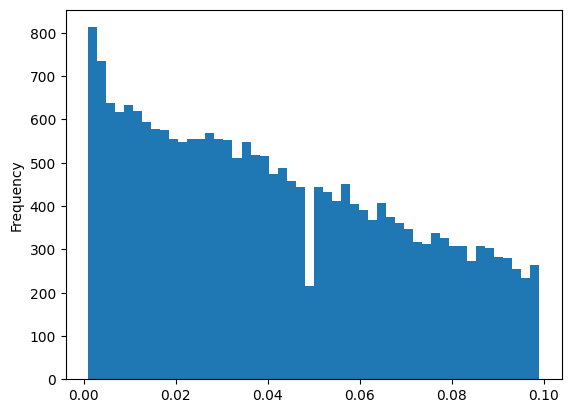

In [216]:
df_short['rentab_net_proc'].plot(kind = 'hist', bins = 50)

In [217]:
# column_mask = ['CUI', 'Cifra de afaceri neta;i13', 'DATORII;i7','Profitul brut;i16','Pierdere bruta;i17', 'Profitul net;i18', 'Pierdere neta;i19']
df.shape

(52477, 23)